<a href="https://colab.research.google.com/github/GabrielFonsecaNunes/data_master_santander-customer_satisfaction/blob/master/Santander_Customer_Satisfaction_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Santander Customer Satisfaction**

<pre>
Informações do Participante:

> Nome: Gabriel da Fonseca

> Matrícula: T770239 

> Data: 24/08/2022

> Versão: Final

</pre>


## <b> Sumário <b>

* 1. Introdução
* > 1.1 Problema de Negócio
* 2. Carregando Dados
* > 2.1 Importando bibliotecas
* > 2.2 Carregando Conjunto de Dados `santander-customer-satisfaction` Competition Kaggle
* 3. Analise Explorátoria Dados (EDA)
* > 3.1 Visão Geral dos Dados do DataSet de treino
* > 3.2 Variáveis constantes e quasi constantes
* > 3.3 Variáveis esparsas Zeros
* > 3.4 Colunas Duplicatadas
* > 3.5 Matrix de Correlação
* > 3.6 Registros Duplicados
* > 3.7 Análise Desbalanceamento entre Classes
* > 3.8 Funções Auxiliares
* > 3.9 Balançeando o conjunto de treinamento
* 4. Feature Selection
* > 4.1 Filter Method
* > 4.1.2 SelectKBest - Anova
* > 4.1.3 Multual Information gain
* > 4.2 Wrapper Method
* 5. Modelagem
* > 5.2 Previsão Clientes
* > 5.3 Score Clientes
* > 5.4 Encontrando Cluster mais lucrativos
* 6. Teste
* 7. Resultados

# <b style = 'font-family:lmmonolt10 italic' > 1. Introdução </b>

> # <h3> <b style = 'font-family:lmmonolt10 italic' > 1.1 Problema de Negócio </b>
> <div>
<br style = 'font-family:lmmonolt10 italic'> O Banco Santander quer identificar clientes insatisfeitos no inicio do relacionamento. Isso </br> 
<br style = 'font-family:lmmonolt10 italic'> irá permitir que o Santander adote medidas proativas para melhorar a felicidade de um cliente </br> <br style = 'font-family:lmmonolt10 italic'> antes que seja tarde demais. </br>
<br style = 'font-family:lmmonolt10 italic'> A partir do Dataset: https://www.kaggle.com/c/santander-customer-satisfaction/data </br>

> Para resolver este case será usado um conjunto de dados sintéticos contendo um > grande número de variáveis numéricas. A coluna `TARGET` é a  variável resposta. > Ela é igual a 1 para clientes insatisfeitos e igual a 0  para clientes > satisfeitos. Duas bases são dadas, uma para treino e  uma para avaliação. Três > são as tarefas a serem realizadas.

> Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ela não se comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um valor fixo de 10 reais por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar o comportamento do cliente. Um falso negativo ocorre quando um cliente é previsto como satisfeito, mas na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada foi ganho. Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de retenção. O benefício neste caso é o lucro da ação (100 reais) menos os custos relacionados à ação de retenção (10 reais). Por fim, um verdadeiro negativo é um cliente insatisfeito e que não é alvo de nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro.

> A primeira tarefa deste case é maximizar o lucro esperado por cliente considerando o contexto descrito no parágrafo acima.

> A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base teste, respeitando a variável TARGET, isto é, o seu nível de satisfação, sendo 1 o mais insatisfeito e 5 o mais satisfeito. Ao dar essa nota deve-se ter em mente que somente os clientes com nota 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado por cliente (usando os mesmos valores da  primeira questão).

> Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que possuem os maiores lucros esperados por cliente (usando os mesmos valores da
primeira questão).


# <h3> <b style = 'font-family:lmmonolt10 italic' > 2. Carregando Dados </b> </h3>

> # <h3> <b style = 'font-family:lmmonolt10 italic' > 2.1 Importando bibliotecas </b>

In [4]:
'''
Autor: Gabriel da F. Nunes
Importando livrarias que serao utilizadas
'''

# Ignorando avisos
import warnings
warnings.filterwarnings("ignore")

# Conecção Kaggle Api
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

# Livraria para interação
import itertools
from collections import OrderedDict

# Analise de Dados
import numpy as np
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import seaborn as sns
import scikitplot as skplot 

# Definindo jupyter como back end para o matplotlib
%matplotlib inline

In [5]:
# Sklearn Feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, chi2, RFE
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold

# Feature Selection Boruta
from boruta import BorutaPy

# Sklearn Modelos  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# # Importando Keras RNN
from tensorflow import keras

# Importando LGBMClassifier, XGBClassifier 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Importando livrarias para Feature Engine
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Metricas para avaliação do desempenho
from sklearn.metrics import accuracy_score, precision_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import silhouette_score, silhouette_samples

In [6]:
# Importando livrarias para Clusterização
from sklearn.cluster import KMeans, AgglomerativeClustering

# Livrarias para tuning hipterparemetros modelos
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import KFold, train_test_split as tt_split, cross_val_score

# Importando a livraria para Balanceamento dos Dados
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Tuning hiperparametros modelos
from hyperopt import tpe, hp, Trials
from hyperopt.fmin import fmin

# Componente de explicabilidade
import shap

# <h3> <b style = 'font-family:lmmonolt10 italic' > 2.2 Carregando Conjunto de Dados `santander-customer-satisfaction` Competition Kaggle</b>

Existem dois conjuntos de dados, sendo  
`train.csv` conjunto de treinamento e outro para `test.csv` validação sem a variável TARGET em seu data set. A partir da api do Kaggle foi feito o carregamento dos dados
de treino e validação.

In [7]:
api = KaggleApi()
api.authenticate()

api.competition_download_files('santander-customer-satisfaction')

file_path = './santander-customer-satisfaction.zip'
dir_to_extrac = '../data_sets/'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall(dir_to_extrac)
    
os.remove(file_path)

path_train = '../data_sets/train.csv'
path_test = '../data_sets/test.csv'

data_train = pd.read_csv(path_train, sep= ',')
data_test = pd.read_csv(path_test, sep= ',')

O conjunto de dados de treino consiste em `76020` observações e com `371` variáveis iniciais, já o conjunto de dados de validação consistem em `75818` observações e com `370` variáveis iniciais (Excluindo a TARGET)

# <h3> <b style = 'font-family:lmmonolt10 italic' > 3. Analise Explorátoria Dados (EDA) </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic'> 3.1 Funções Auxiliares </b> </h3>

In [9]:
'''
####################################################
/            Funções Auxiliares utilizadas         /
/          durante desenvolvimento do projeto      /
####################################################
'''

seed = 42 # O guia do mochileiro das galaxias

def print_describe_col_info(dt_set = None):
  '''
  Args:
    dt_set (pd.DataFrame()): conjunto de dados
  '''
  n_col_bin = 0
  n_col_category = 0
  n_col_num = 0
  n_col_float = 0

  for column in dt_set.columns:
    if dt_set[column].dtypes == 'int64':
      count_category =  len(dt_set[column].unique())
      if count_category == 2:
        n_col_bin += 1
      elif count_category > 2 and count_category <= 10:
        n_col_category += 1
      else:
        n_col_num += 1
    else:
      n_col_float += 1

  print(f'''
  > Qtde de variaveis binárias: {n_col_bin},
  > Qtde de variaveis categoricas nao binárias: {n_col_category},
  > Qtde de total de variaveis categoricas: {n_col_category + n_col_bin},
  > Qtde de total de variaveis númericas discretas: {n_col_num},
  > Qtde de total de variaveis númericas continuas: {n_col_float}
  ''')


def drop_col_ref(df = None):
  '''
  df (pd.DataFrame())): Conjunto de dados
  '''
  df = df.drop('ID', axis = 1)
  return df

def drop_col_quasi_constant(df = None, threshold = 0.1) -> pd.DataFrame():
  '''
  Args:
    df (pd.DataFrame())): Conjunto de dados
  Returns:
    df (pd.DataFrame())): Conjunto de dados dropado colunas constantes e quase 
    que constantes
  '''
  # Todas as variáveis com variância menor que 0.1 serão dropadas
  selector = VarianceThreshold(threshold)
  selector.fit(df)
  mask = list(selector.get_support())

  return df.loc[:, mask]


def drop_col_sparse(df = None) -> pd.DataFrame():
  '''
  Args:
    df (pd.DataFrame())): Conjunto de dados
  Returns:
    df (pd.DataFrame())): Conjunto de dados dropado colunas esparsas com zeros
  '''
  column_sparse = []

  for column in df.columns:
    # Verifica se há zero dentro da coluna
    if len(df[column].isin([0]).value_counts()) > 1: 
      ratio_col_zero = (df[column].isin([0]).value_counts()[1] / df.shape[0])
      if ratio_col_zero >= 0.998: # Se há 99.8% de zeros dentro da coluna dropa ela
        column_sparse.append(column)

  df = df.loc[:, [column for column in df.columns if column not in column_sparse]]

  return df


def drop_strongh_weak_corr(df = None, target_threshold = 0.0005, within_threshold = 0.98, method = 'pearson') -> pd.DataFrame():
  '''
  Args:
    df (pd.DataFrame())): Conjunto de dados
  Returns:
    df (pd.DataFrame())): Retorna o conjunto de dados removido todas as colunas 
    com quase nenhuma correlação com target e sem as colunas correlacionadas entre 
    si acima within_threshold.
  '''
  threshold = target_threshold

  corr = df.corr(method = method).abs()

  corr_target = pd.DataFrame(corr['TARGET']).sort_values(by='TARGET')

  threshold = target_threshold

  feat_df = corr_target[(corr_target['TARGET']) <= threshold]

  df = df.drop(feat_df.index, axis=1)

  corr.drop('TARGET',axis=1,inplace=True)

  corr.drop('TARGET',axis=0,inplace=True)

  corr.drop(feat_df.index,axis=1,inplace=True) 

  threshold = within_threshold

  upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

  column = [col for col in upper.columns if any(upper[col]>threshold)]
  df = df.drop(column, axis=1)

  return df


def drop_col_duplicated(df = None) -> pd.DataFrame():
  '''
  Dropa colunas duplicadas dentro do conjunto de dados
  Args:
    df (pd.DataFrame())): Conjunto de dados
  Returns:
    df (pd.DataFrame())): Conjunto de dados sem colunas duplicadas
  '''
  # Gerando uma lista de combinações das colunas dois a dois
  df = df.copy()
  combinations = list(itertools.combinations(df.columns, 2)) 
  remove=[]

  for feature1, feature2 in combinations:
      if (feature1 not in remove) & (feature2 not in remove):
          if df[feature1].equals(df[feature2]):
              remove.append(feature1)
  df = df.drop(remove, axis=1)
  return df


def drop_raw_duplicated(df = None) -> pd.DataFrame():
  '''
  Dropa linhas duplicadas
  Args:
    df (pd.DataFrame())): Conjunto de dados
  Returns:
    df (pd.DataFrame())): Conjunto de dados sem registros duplicados
  '''
  df = df.drop_duplicates()
  return df

def balanced_oversample(df = None) -> pd.DataFrame():
  '''
  Faz o balançeamento entre as classes
  Args:
    df (pd.DataFrame())): Conjunto de dados desbalançeado
  Returns:
    df_over (pd.DataFrame())): Conjunto de dados aplicado oversample,
    por padrão somente a classe rara será feita bootstrap, default 50/50
  '''
  # Define features
  X = df.iloc[:, :-1]
  # Define target
  y = df.TARGET

  # Instancia o balanceador oversample
  sm = SMOTE(n_jobs = -1, sampling_strategy= 0.5)
  X_res, y_res = sm.fit_resample(X, y)
  # Instancia o balanceador oversample
  df = pd.concat([X_res, y_res], axis = 1)
  return df


def score_satisficaiton_customer(y_proba = None):
  '''
  Score de satisfação do cliente
  Args:
    y_proba (np.array): Probabilidade do clinte estar insatisfeito
  Return:
    note_satisfication (np.array or float): Score satisfação
    sendo 1 insatisfeito e zero satisfeito.
  '''
  note_satisfication = 1 + 4 * (1 - y_proba)
  return note_satisfication

  
def info_gain(y_true, y_pred) -> pd.DataFrame():
  '''
  Calcula receita, lucro e custo do retorno da ação
  Args:
    y_true (np.array[]): classe
    y_pred (np.array[]): classe prevista
  Returns:
    info (pd.DataFrame()): Tabela com retorno sobre ação, por exemplo, 
    lucros, custo e receitas (total e por clientes). 
  '''
  # Value gain for each classification
  gain_tp = 90
  gain_fp = - 10
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

  info = pd.DataFrame()
  total_clientes = [tp + fp]
  info["Receita (R$)"] = [tp * gain_tp] 
  info["Custo (R$)"] = [fp * gain_fp]
  info["Lucro (R$)"] = [tp * gain_tp + fp * gain_fp]
  info["Receita Per. Cliente (R$)"] = round(info["Receita (R$)"] / total_clientes, 2)
  info["Custo Per. Cliente (R$) "] = round(info["Custo (R$)"] / total_clientes, 2)
  info["Lucro Per. Cliente(R$)"] = round(info["Lucro (R$)"] / total_clientes, 2) 
  info["Total_clientes_acao"] = total_clientes
  info = info.T
  info.columns = ["Resumo"]
  return info

def plot_balanced_target(y_target = None):
  '''
  Plota a disbribuicao entre as classes da target
  Args:
    y_target (np.array | pd.DataFrame())
  '''  
  LABELS = ["Satisfeito","Insatisfeito"]
  plt.figure(figsize=(5,4))

  ax = sns.countplot(x= y_target["TARGET"], data = y_target, palette=['#d90007', 'black'])
  plt.title('Distribuição da variável TARGET')
  plt.xticks(range(2), LABELS)
  plt.xlabel('Classes')
  plt.ylabel('Frequência da TARGET')

  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(data_train)), (p.get_x()+0.3, p.get_height()+1))

# def objective(params):
#   '''
#   '''
#   est = int(params['n_estimators'])
#   md = int(params['max_depth'])
#   msl = int(params['min_samples_leaf'])
#   mss = int(params['min_samples_split'])
#   model = RandomForestClassifier(n_estimators = est, max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
#   model.fit(X_train, y_train)
#   mask_features = X_train.columns 
#   X_eval = X_test.loc[:, mask_features].copy()
#   pred = model.predict(X_eval)
#   score = roc_auc_score(y_test, pred)
#   return score

# def optimize(trial):
#     '''
#     '''
#     params={'n_estimators':hp.uniform('n_estimators',100,500),
#            'max_depth':hp.uniform('max_depth', 0, 50),
#            'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
#            'min_samples_split':hp.uniform('min_samples_split',2,6)}
#     best= fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=500,rstate=np.random.RandomState(seed))
#     return best

# trial=Trials()
# best=optimize(trial)


# <h3> <b style = 'font-family:lmmonolt10 italic'> 3.2 Visão Geral dos Dados do DataSet de treino </b> </h3>

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


Pode-se notar que nosso conjunto de dados tem somente varíaveis do 
tipo float64 ou int64

In [11]:
# Primeiras 5 linhas do conjunto de dados
data_train.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [12]:
# Ultimas 5 linhas do conjunto de dados
data_train.tail()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0
76019,151838,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<br style = 'font-family:lmmonolt10 italic' > Verificamos a existência de `370 colunas`, e `76.020 registros` dentro do dataset de treino. <br>

In [13]:
print_describe_col_info(dt_set = data_train)


  > Qtde de variaveis binárias: 104,
  > Qtde de variaveis categoricas nao binárias: 75,
  > Qtde de total de variaveis categoricas: 179,
  > Qtde de total de variaveis númericas discretas: 81,
  > Qtde de total de variaveis númericas continuas: 111
  


> A partir do enunciado que nos diz que todos os dados são númericos dentro do conjunto de dados, entretanto, podemos presumir que existem váriavies númericas (discretas e continuas) ou variaveis qualitativas (ordinais ou nominais). Para este projeto vamos assusmir que existem somente variaveis numéricas contínuas e discretas.  

## <h3> <b style = 'font-family:lmmonolt10 italic'> 3.3 Análise Balançeamento classes de clientes </b> </h3>

> Analisando as distribuicão entre as classes, a partir da figura abaixo podemos notar que existe um grande desbalançamento entre as distribuições e que o nossa variável TARGET tem apenas `4%` da base clientes como por clientes insatisfeitos 

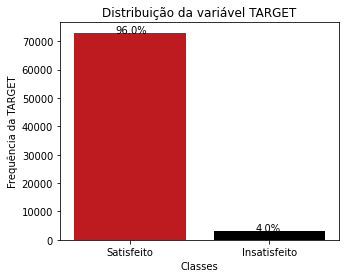

In [14]:
y_target = data_train.iloc[:, [-1]]
plot_balanced_target(y_target)

# <h3> <b style = 'font-family:lmmonolt10 italic'> 3.4 Separação da base entre Treino e Teste  </b> </h3> 

> Antes de começar a fazer o tratamento e limpeza dos dados, será necessário primeiramente separar o conjunto de dados entre treinamento e teste a partir da função `train_test_split` para evitar qualquer vazamente entre o conjunto de treinamento e validação. 

In [15]:
seed = 42
test_size = 0.3

clear_data = data_train[data_train.drop(['ID'], axis = 1).duplicated() != True]

X_set = clear_data.drop('TARGET', axis = 1)
y_set = clear_data['TARGET'].values

X_train, X_test, y_train, y_test = tt_split(X_set, y_set, test_size = test_size, random_state= seed) 

# <h3> <b style = 'font-family:lmmonolt10 italic'> 3.5 Limpeza e Tratamento dos dados </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic'> 3.3.1 Variáveis de referência  </b> </h3> 

In [16]:
X_train = drop_col_ref(df = X_train)
X_train.shape

(49849, 369)

# <h3> <b style = 'font-family:lmmonolt10 italic'> 3.5.2 Variáveis constantes e quasi constantes  </b> </h3> 

In [17]:
# Eliminação variávies quase que constantes
# Todas as variáveis com variância menor que 0.1 serão dropadas

X_train = drop_col_quasi_constant(df= X_train, threshold= 0.1)

X_train.shape

(49849, 215)

<br> Após esse simples passo de remoção de variáveis constantes e quase </br> <br> que constantes, o conjunto de treinamento de `369` variáveis ficou com </br> <br>  `215` variáveis dentro do conjunto de treinamento. </br>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 3.5.3 Variáveis esparsas Zeros </b> </h3> 

In [18]:
X_train = drop_col_sparse(df = X_train)
X_train.shape

(49849, 144)

> Foram dropadas `71` variáveis com `99%` de zeros dentro do conjunto de treinamento, após esta limpeza ficamos com `144` variáveis. 

> Variáveis esparsas não ajudam a separar nossos clientes entre insatisfeitos e satisfetitos, visto que existe quase nenhum ou nehum ganho de informação contidas nestas variáveis.

# <h3> <b style = 'font-family:lmmonolt10 italic' > 3.5.3 Colunas Duplicatadas </b> </h3> 

In [19]:
X_train = drop_col_duplicated(df = X_train)
X_train.shape

(49849, 141)

> Pode-se notar que havia `3` variáveis que tinham colunas duplicadas. 

# <h3> <b style = 'font-family:lmmonolt10 italic' > 3.5.5 Analise de Correlação </b> </h3> 

> Vamos checar se existe correlação entre as variaveis do nosso conjunto de dados. A correção mede o grau do relacionamento entre duas variáveis, por exemplo, podemos ter uma correção linear, onde se uma variável cresce a outra cresce ou diminui (vice-versa). Essa correção linear é chamada de `correlação de Pearson`, para avaliação do relaciomento das variáveis utilizaremos a `correlação de Spearman` que mede relaciomento não linear entre as variáveis.

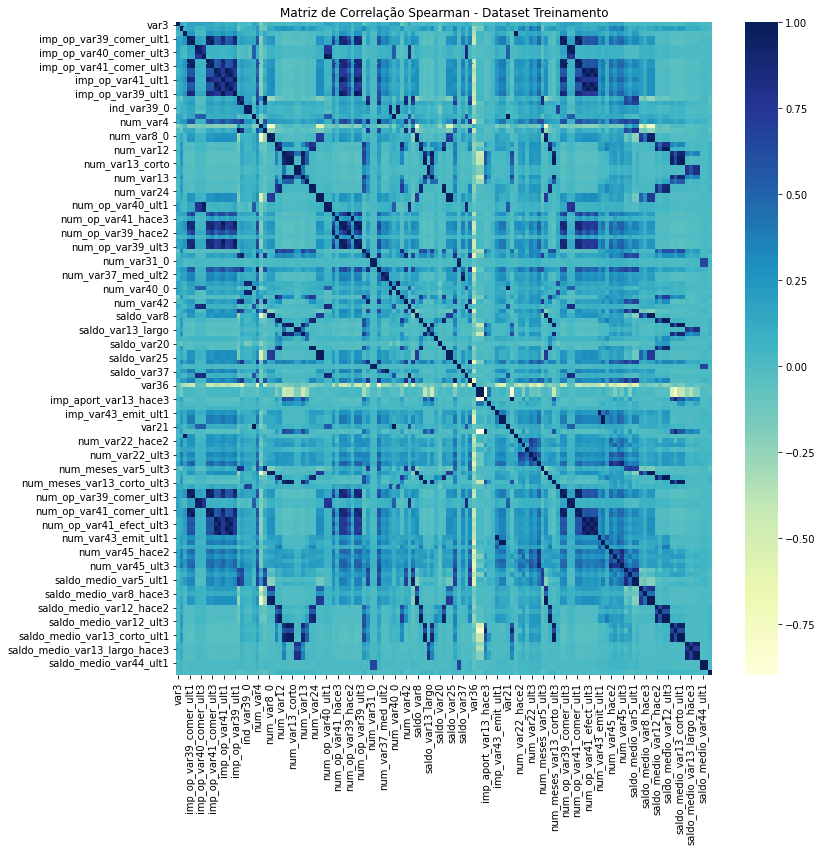

In [20]:
# Matriz de correção de pearson
# corr_pearson = X.corr(method= 'pearson')

# Matriz de correção de Spearman
corr_sparman = X_train.corr(method= 'spearman')

from seaborn import palettes
plt.figure(figsize= (12, 12))
sns.heatmap(corr_sparman, cmap="YlGnBu")
plt.title('Matriz de Correlação Spearman - Dataset Treinamento')
plt.show()

Pode-se notar que a partir do grafico da matrix de correções que há variaveis `perfeitamente` correlacionadas entre si tanto linearmente quanto não linearmente. 

In [21]:
data_set = pd.DataFrame(data = X_train)
data_set['TARGET'] = y_train

data_set = drop_strongh_weak_corr(df = data_set)
X_train = data_set.drop('TARGET', axis = 1)
X_train.shape

(49849, 116)

> Foram dropadas `25` variáveis de um total de `141` variáveis com correlação praticamente perfeita com a target junto a variáveis com quase nenhuma correlação com target

<h3> <b style = 'font-family:lmmonolt10 italic' > 3.5 Variáveis Nulas  </b> </h3> 

In [22]:
X_train.isnull().sum().sum()

0

Não há presença de qualquer variável com valor `null` dentro do conjunto de treinamento. Isso é ótimo 🤝

# <h3> <b style = 'font-family:lmmonolt10 italic' > 3.6 Registros Duplicados </b> </h3> 

In [23]:
# Verificando o número de registros duplicados.
X_train.drop_duplicates()
X_train.shape

(49849, 116)

Pode se notar que há registros `4807` registros duplicados

# <h3> <b style = 'font-family:lmmonolt10 italic' > 4. Feature Selection </b> </h3>


# <h3> <b style = 'font-family:lmmonolt10 italic' >  4.1 Filter Method </b> </h3>

<h3> <b style = 'font-family:lmmonolt10 italic' >  4.1.1 SelectKBest - Chi2 </b> </h3>

Este metodo chamado SelectKbest seleciona as K melhores features através de um teste estatístico passado. Neste caso vamos utilizar o teste estatisco chi2.

In [24]:
# Numero top features
top = 30

scaler = MinMaxScaler()

trainFeaturesMM = scaler.fit_transform(X_train)

trainFeaturesMM = pd.DataFrame(data = trainFeaturesMM, columns = X_train.columns)

tFeatures = trainFeaturesMM

skb = SelectKBest(chi2, k = top)

bestFeatuesSKB = skb.fit_transform(tFeatures, y_train)

bfSkb = tFeatures.columns[skb.get_support()]

bfSkb

# K Best Features Chi2
kbfeatures_chi2 = tFeatures.loc[:, skb.get_support()]

sc = pd.DataFrame(skb.scores_, columns = ["score"], index = tFeatures.columns)
sc.sort_values(["score"] , ascending= True, inplace = True)


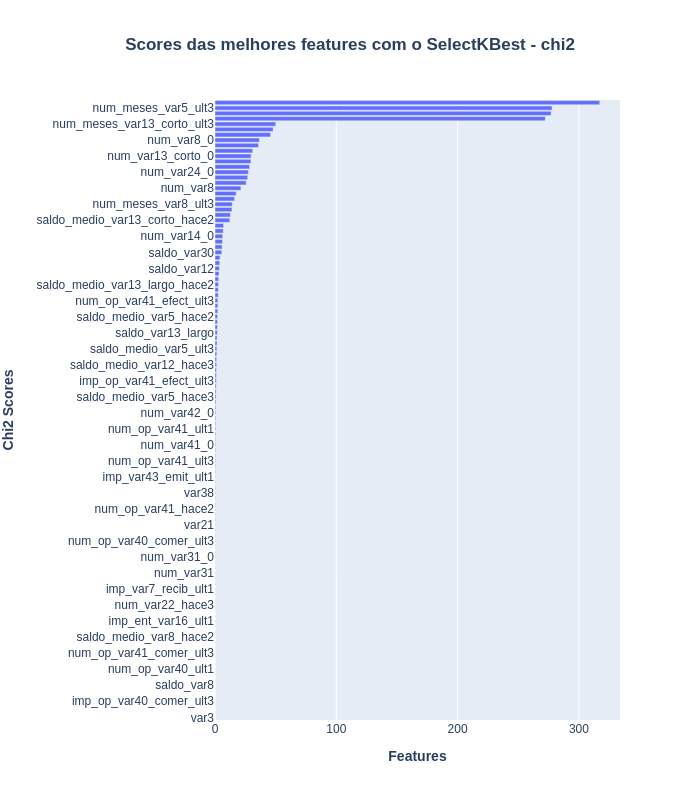

In [25]:
fig = go.Figure()

fig.add_trace(go.Bar(x = sc.score.values, y = sc.index, orientation = 'h' ))

fig.update_layout(title = '<b> Scores das melhores features com o SelectKBest - chi2 </b>', 
                  title_x = 0.5,
                  height = 800
)
fig.update_yaxes(title = '<b> Chi2 Scores </b>')
fig.update_xaxes(title = '<b> Features </b>')

img_bytes = fig.to_image(format="png", engine = "kaleido")
Image(data = img_bytes)

# <h3> <b style = 'font-family:lmmonolt10 italic' >  4.1.2 SelectKBest - Anova </b> </h3>
A análise de variância é um método estatístico, utilizado para verificar as médias de dois ou mais grupos que são significativamente diferentes entre si. O teste de Anova usa a estatistica F para medir a relevancia
de cada feature a partir da difenrente entre os grupos e fora dos grupos.

In [26]:
# Numero top features
top = 30

scaler = MinMaxScaler()

trainFeaturesMM = scaler.fit_transform(X_train)

trainFeaturesMM = pd.DataFrame(data = trainFeaturesMM, columns = X_train.columns)

tFeatures = trainFeaturesMM

skb = SelectKBest(f_classif, k = top)

bestFeatuesSKB = skb.fit_transform(tFeatures, y_train)

bfSkb = tFeatures.columns[skb.get_support()]

# K Best Features Anova
kbfeatures_anova = tFeatures.loc[:, skb.get_support()]

# <h3> <b style = 'font-family:lmmonolt10 italic' >  4.1.3 Multual Information gain </b> </h3>

A seleção de atribuitos através do multual information gain (ganho de informação) mede 
quando o ganho de informação da variavel estar presente ou não de contribui para previsão correta da target 

In [27]:
tFeatures = trainFeaturesMM.copy()

bestFeatuesIG = mutual_info_classif(tFeatures, y_train, discrete_features = 'auto', n_neighbors = 3)

scoreFeatures = pd.DataFrame(bestFeatuesIG, index = tFeatures.columns,  columns = ['score'])

bfIg = scoreFeatures.sort_values(by = 'score', ascending = True)

mask_ig = list(scoreFeatures[scoreFeatures.score >= scoreFeatures.score.median()].index)
bfeatures_ig = tFeatures.loc[:, mask_ig]

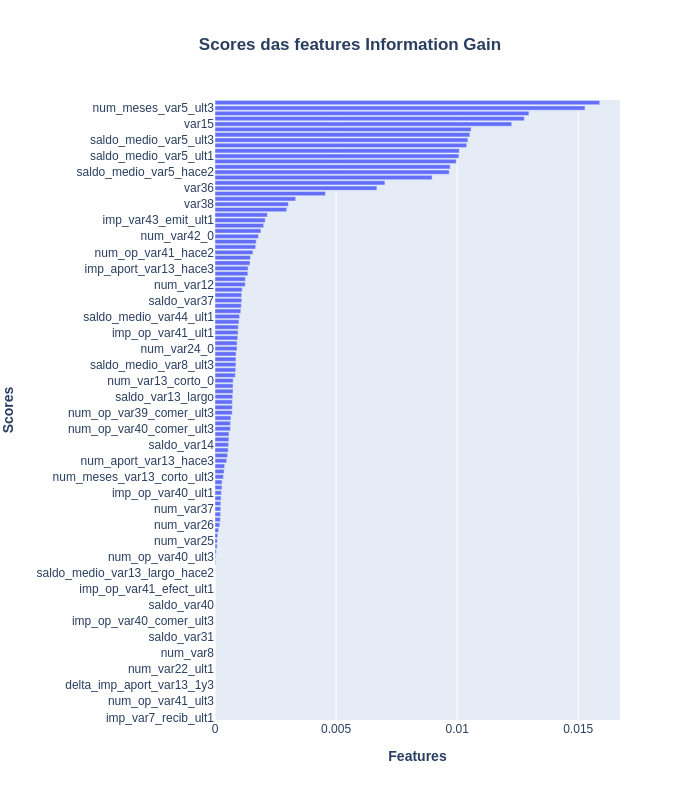

In [28]:
fig = go.Figure()

fig.add_trace(go.Bar(x = bfIg.score.values, y = bfIg.index, orientation = 'h' ))


fig.update_layout(title = '<b> Scores das features Information Gain </b>', 
                  title_x = 0.5,
                  height = 800
)
fig.update_yaxes(title = '<b> Scores </b>')
fig.update_xaxes(title = '<b> Features </b>')

img_bytes = fig.to_image(format="png")
Image(img_bytes)

# <h3> <b style = 'font-family:lmmonolt10 italic' > 4.2 Wrapper Method </b> </h3>

<h3> <b style = 'font-family:lmmonolt10 italic' > 4.2.1 Random Forest Importance </b> </h3>

In [29]:
# Define semente
seed = 0

# Instancia Model RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = "gini", n_estimators= 200, class_weight = "balanced", n_jobs= -1)

# Treinando a random forest
rf_clf.fit(X_train, y_train)

# Criando score de cada feature
featuresImpRf = pd.Series(data = rf_clf.feature_importances_, index = X_train.columns)
featuresImpRf.sort_values(ascending= True, inplace = True)
name_features_importance_rf = list(featuresImpRf[featuresImpRf.values >= featuresImpRf.median()].index)
bfeatures_rf = X_train.loc[:, name_features_importance_rf]

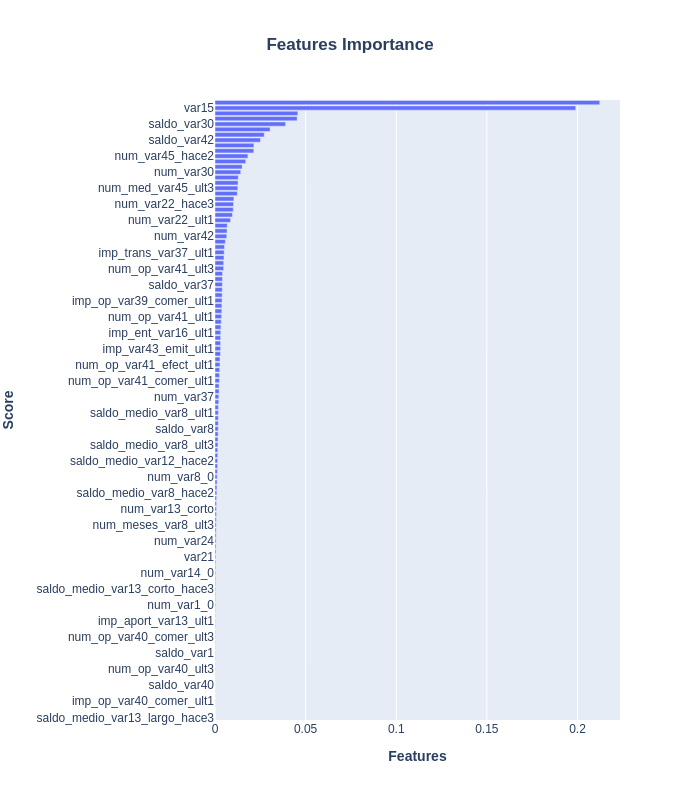

In [30]:
fig = go.Figure()

fig.add_trace(go.Bar(x = featuresImpRf.values, y = featuresImpRf.index, orientation = 'h' ))


fig.update_layout(title = '<b> Features Importance </b>', 
                  title_x = 0.5,
                  height = 800
)
fig.update_yaxes(title = '<b> Score </b>')
fig.update_xaxes(title = '<b> Features </b>')

img_bytes = fig.to_image(format="png")
Image(img_bytes)

<h3> <b style = 'font-family:lmmonolt10 italic' > 4.2.2  Recursive Feature Elimination </b> </h3>

O Recursive Feature Elimination irá treinar o seu modelo utilizando todo seu conjunto inicial, com todas as features e data points que vierem nele. Após o primeiro treino, o RFE irá verificar a importância das features — utilizando atributos como coef_ ou feature_importances_ e, recursivamente, irá remover as features menos importantes do dataset e treinar o modelo novamente.

In [31]:
# Define semente
seed = 0

# Instancia Model RandomForestClassifier
model = RandomForestClassifier(n_jobs= -1, n_estimators= 100, random_state = seed)

# Faz seleção de features 
rfe_rf = RFE(model, step= 0.05).fit(X_train, y_train)

bfeatures_rfe_rf = X_train.loc[:, rfe_rf.get_support()]

# <h3> <b style = 'font-family:lmmonolt10 italic' > 5. Modelagem </b> </h3>

A partir dos métodos de seleção de features utilizados será feita a avaliação com vários tipos de modelos diferentes. O Estimador que apresentar a melhor classificação para clientes será escolhido na fase final.

In [35]:
selection_feature_list = [kbfeatures_chi2, kbfeatures_anova, bfeatures_ig, bfeatures_rf, bfeatures_rfe_rf]

In [41]:
# Regressão Logistica
lr = LogisticRegression(penalty='l1', solver='liblinear', class_weight = 'balanced', n_jobs= -1)

# Random Forest 
rf_clf = RandomForestClassifier(n_estimators = 100, class_weight= 'balanced', n_jobs = -1)

# Extra Tree Forest
extra_clf = ExtraTreeClassifier(class_weight= 'balanced')

# Ada Boost
ada_clf = AdaBoostClassifier(learning_rate= 0.1, n_estimators = 100)

# Gradiente Boost Classifier
gb_clf = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100)

models = [
          lr, 
          rf_clf, 
          extra_clf,
          ada_clf, 
          gb_clf
        ]

name_models = [
               "LogisticRegression",
               "RandomForestClassifier",
               "ExtraTreeClassifier", 
               "AdaBoostClassifier",
               "GradientBoostingClassifier",
               ]

names_features_selection = ["Chi2", 
                            "Anova", 
                            "Mututal_information", 
                            "Random_Forest_Importance",
                            "RFE_Random_Forest"]
cv_score = []

eva_model = []

In [ ]:
for (i, model) in enumerate(models):
  for (j, feature_selection) in enumerate(selection_feature_list):
    features = X_train.loc[:, feature_selection.columns]    
    name_filter_selection = names_features_selection[j]
    cv_score = cross_val_score(model, features, y_train, cv = 5, scoring = "f1")
    eva_model.append([name_models[i], name_filter_selection, cv_score])
    
eva_model

# <h3> <b style = 'font-family:lmmonolt10 italic' > 5.2 Previsão Clientes </b> </h3>

De acordo com os metodo da validação cruzada foi selecionado Gradiente Boosting como melhor modelo junto seleção de atribuitos da RFE_Random_Forest. 

In [ ]:
data_test = pd.read_csv(path_dt_test, sep= ',')

# <h3> <b style = 'font-family:lmmonolt10 italic' > 5.3 Score Clientes </b> </h3> 

Dado um cliente qualquer dentro do conjunto de validação, através da função
*score_satisfication_customer* será dado um score para aquele(s) cliente(s). O score vai de 1 até 5, sendo 1 completamente insatisfeito e 5 mais satisfeito.

In [ ]:
score_satisficaiton_customer()

# <h3> <b style = 'font-family:lmmonolt10 italic' > 5.4 Encontrando Cluster mais lucrativos </b> </h3>

In [ ]:
pca = PCA(n_components = 2).fit()

k = [i for i in range(2, 11)] 

sse = OrderedDict()
slc = OrderedDict()
db = OrderedDict()

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, n_init = 10, init = 'k-means++').fit(features)
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(features, clusters)
    slc[k] = silhouette_score(features, clusters)


In [ ]:
sns.lineplot(x = list(sse.keys()), y = sse.values())
plt.title('Metodo Elbow - Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Distância intra cluster ao quadrado')
plt.show()

# <h3> <b style = 'font-family:lmmonolt10 italic' > 6. Teste </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 7. Resultados </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 7.1 Ação de Retenção de Clientes Insatisfeitos Maximizando o Lucro </b> 
<div>
<br> Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ela não se </br>
<br> comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um </br>
<br> valor fixo de 10 reais por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar </br>
<br> o comportamento do cliente. Um falso negativo ocorre quando um cliente é previsto como </br>
<br> satisfeito, mas na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada </br>
<br> foi ganho. Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de </br>
<br> retenção. O benefício neste caso é o lucro da ação (100 reais) menos os custos relacionados à ação  </br>
<br> de retenção (R$ 10). Por fim, um verdadeiro negativo é um cliente insatisfeito e que não é alvo de </br>
<br> nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro.  </br>
</div>
# <h3> <b style = 'font-family:lmmonolt10 italic' > 7.2 Score Clientes </b>

<div>
<br> A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base teste, </br>
<br> respeitando a variável ‘TARGET’, isto é, o seu nível de satisfação, sendo 1 o mais insatisfeito </br>
<br> e 5 o mais satisfeito. Ao dar essa nota deve-se ter em mente que somente os clientes com nota </br>
<br> 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado </br>
<br> por cliente (usando os mesmos valores da primeira questão). </br>
</div>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 7.3 Grupos Lucrativos </b>
<div>
<br  style = 'font-family:lmmonolt10 italic'> Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos </br>
<br style = 'font-family:lmmonolt10 italic'> como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que </br> 
<br style = 'font-family:lmmonolt10 italic'> possuem os maiores lucros esperados por cliente (usando os mesmos valores da primeira </br>
<br style = 'font-family:lmmonolt10 italic'> questão). </br>
</div>

<b style = 'font-family:lmmonolt10 italic' > 7.1   Receita, Custo e ROI </b>

<br> <b style = 'font-family:lmmonolt10 italic' > 7.2   Score para os clientes Santander  </b> </br>

Dado um cliente qualquer dentro do conjunto de validação, através da função
*score_satisfication_customer* é possivel dar uma score para aquele(s) cliente(s). O score vai de 1 até 5, sendo 1 completamente insatisfeito e 5 mais satisfeito.


In [ ]:
score_satisficaiton_customer()

<br> <b style = 'font-family:lmmonolt10 italic' > 7.3   Cluster mais lucrativos  </b> </br>

<h3> <b style = 'font-family:lmmonolt10 italic' > Convertendo Jupyter to pdf </b> </h3>

In [2]:
# Instalando dependencias
!pip install kaggle boruta imblearn hyperopt shap
!pip install nbconvert tensorflow scikit-plot
!pip install lightgbm xgboost
!pip install plotly==5.3.1
!pip install kaleido

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.0 MB/s 
     |████████████████████████████████| 569 kB 10.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 56.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 133 kB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 72 bytes


In [ ]:
# Convert Notebook in PDF
!jupyter nbconvert --to pdf './drive/MyDrive/Colab Notebooks/Santander_Customer_Satisfaction_Case.ipynb'